In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perbandingan Submission

In [414]:
bis1 = pd.read_csv('/content/submission xgb.csv')
bis2 = pd.read_csv('/content/bismillah2.csv')
bis3 = pd.read_csv('/content/bismillah3.csv')
bis4 = pd.read_csv('/content/bismillah4.csv')
bis5 = pd.read_csv('/content/bismillah5.csv') # ngecek bismillah3 pake lgbm sama apa engga

In [415]:
bis1['Result'].value_counts()

,count
Result,
Legitimate,45855
Phishing,24145


In [416]:
bis2['Result'].value_counts()

,count
Result,
Legitimate,47108
Phishing,22892


In [417]:
bis3['Result'].value_counts()

,count
Result,
Legitimate,47179
Phishing,22821


In [418]:
bis4['Result'].value_counts()

,count
Result,
Legitimate,47087
Phishing,22913


In [ ]:
bis5['Result'].value_counts()

# Membaca Data

In [419]:
#train = pd.read_csv('/content/train.csv', index_col='id')
#test = pd.read_csv('/content/test.csv', index_col='id')
#sample_submission = pd.read_csv('/content/sample_submision.csv', index_col='id')
#train.shape, test.shape

In [420]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submision.csv', index_col='id')
train.shape, test.shape

((132660, 29), (70000, 28))

In [421]:
sample_submission

,Result
id,
1,Phishing
2,Phishing
3,Phishing
4,Phishing
5,Phishing
...,...
69996,Phishing
69997,Phishing
69998,Phishing


In [422]:
train

,id,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,domain_registration_length,favicon,...,on_mouseover,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,page_rank,google_index,links_pointing_to_page,Result
0,70005,No,44,Yes,Yes,6,Yes,1,1.156395,No,...,No,NaN,No,Yes,1,Yes,2.247106,Yes,2,Phishing
1,70006,Yes,53,Yes,Yes,6,No,1,1.278885,Yes,...,Yes,Enabled,Yes,Yes,2,Yes,2.675417,No,1,Phishing
2,70007,Yes,49,Yes,No,7,Yes,3,1.515832,NaN,...,No,Disabled,No,No,1,Yes,2.680063,Yes,2,Legitimate
3,70008,Yes,40,No,Yes,7,No,1,1.707852,No,...,Yes,NaN,No,Yes,2,No,2.493129,No,0,Phishing
4,70009,NaN,51,No,NaN,7,No,1,1.396846,No,...,Yes,Disabled,No,Yes,1,No,2.133598,Yes,2,Legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132655,202660,Yes,52,Yes,Yes,7,No,1,1.721079,NaN,...,Yes,Disabled,NaN,Yes,2,Yes,2.063996,Yes,0,Legitimate
132656,202661,Yes,47,Yes,Yes,6,NaN,7,1.217118,Yes,...,Yes,Disabled,Yes,Yes,5,Yes,2.592432,Yes,0,Legitimate
132657,202662,Yes,40,Yes,NaN,6,No,3,1.759058,NaN,...,Yes,Disabled,Yes,Yes,3,Yes,2.201574,Yes,0,Legitimate
132658,202663,Yes,41,Yes,Yes,7,No,1,1.856783,Yes,...,Yes,Disabled,NaN,Yes,5,Yes,2.628736,Yes,0,Legitimate


In [423]:
test

,id,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,domain_registration_length,favicon,...,redirect,on_mouseover,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,page_rank,google_index,links_pointing_to_page
0,1,Yes,50,Yes,Yes,7,No,1,1.838718,NaN,...,5,No,NaN,NaN,Yes,5,No,2.479710,NaN,0
1,2,Yes,41,Yes,NaN,7,No,6,1.637320,No,...,1,Yes,Enabled,No,No,3,No,2.635774,NaN,0
2,3,No,47,Yes,No,6,No,1,1.334754,Yes,...,5,Yes,Disabled,No,No,5,Yes,2.104309,No,0
3,4,Yes,50,Yes,Yes,6,No,1,1.763969,Yes,...,1,NaN,Enabled,No,No,2,No,2.625191,NaN,2
4,5,No,49,No,Yes,6,No,8,1.799184,Yes,...,1,Yes,Disabled,Yes,Yes,5,No,2.131189,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,No,52,Yes,Yes,6,No,1,1.664726,Yes,...,6,Yes,Disabled,No,Yes,1,Yes,2.061483,Yes,0
69996,69997,Yes,40,Yes,Yes,7,Yes,4,1.581241,Yes,...,6,NaN,Enabled,Yes,Yes,4,No,2.227301,Yes,2
69997,69998,NaN,48,NaN,NaN,7,Yes,6,1.301044,No,...,6,No,Disabled,No,No,5,No,2.431542,Yes,2
69998,69999,No,42,NaN,Yes,7,No,9,1.993863,No,...,1,NaN,Disabled,Yes,No,2,No,2.193431,No,1


In [424]:
train.columns

Index(['id', 'having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'domain_registration_length', 'favicon', 'port',
       'https_token', 'request_url', 'url_of_anchor', 'links_in_tags', 'sfh',
       'submitting_to_email', 'abnormal_url', 'redirect', 'on_mouseover',
       'rightclick', 'popupwindow', 'iframe', 'age_of_domain', 'dnsrecord',
       'page_rank', 'google_index', 'links_pointing_to_page', 'Result'],
      dtype='object')

In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132660 entries, 0 to 132659
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          132660 non-null  int64  
 1   having_ip_address           124865 non-null  object 
 2   url_length                  132660 non-null  int64  
 3   shortining_service          121041 non-null  object 
 4   having_at_symbol            114554 non-null  object 
 5   double_slash_redirecting    132660 non-null  int64  
 6   prefix_suffix               124753 non-null  object 
 7   having_sub_domain           132660 non-null  int64  
 8   domain_registration_length  132660 non-null  float64
 9   favicon                     114643 non-null  object 
 10  port                        124446 non-null  object 
 11  https_token                 120692 non-null  object 
 12  request_url                 132660 non-null  int64  
 13  url_of_anchor 

In [426]:
train.describe()

,id,url_length,double_slash_redirecting,having_sub_domain,domain_registration_length,request_url,url_of_anchor,links_in_tags,redirect,age_of_domain,page_rank,links_pointing_to_page
count,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000,132660.000000
mean,136334.500000,46.482625,6.500460,3.088218,1.550194,15.498801,25.005179,12.996653,3.820368,2.999600,2.350183,0.834909
std,38295.787693,4.030564,0.500002,2.781874,0.259340,3.450062,3.162222,2.002438,1.952085,1.417522,0.201635,0.777316
min,70005.000000,40.000000,6.000000,1.000000,1.100001,10.000000,20.000000,10.000000,1.000000,1.000000,2.000006,0.000000
25%,103169.750000,43.000000,6.000000,1.000000,1.326145,12.000000,22.000000,11.000000,1.000000,2.000000,2.175482,0.000000
50%,136334.500000,46.000000,7.000000,1.000000,1.550711,15.000000,25.000000,13.000000,4.000000,3.000000,2.349830,1.000000
75%,169499.250000,50.000000,7.000000,5.000000,1.774446,18.000000,28.000000,15.000000,5.000000,4.000000,2.524631,1.000000
max,202664.000000,53.000000,7.000000,9.000000,1.999990,21.000000,30.000000,16.000000,6.000000,5.000000,2.699998,2.000000


In [427]:
test.describe()

,id,url_length,double_slash_redirecting,having_sub_domain,domain_registration_length,request_url,url_of_anchor,links_in_tags,redirect,age_of_domain,page_rank,links_pointing_to_page
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,35000.500000,46.501243,6.500800,2.676371,1.550099,15.498700,24.998643,13.005800,3.834371,3.003543,2.350557,0.919857
std,20207.403759,4.027708,0.500003,2.635726,0.259212,3.461218,3.160883,2.000777,1.940926,1.413845,0.202450,0.835661
min,1.000000,40.000000,6.000000,1.000000,1.100001,10.000000,20.000000,10.000000,1.000000,1.000000,2.000001,0.000000
25%,17500.750000,43.000000,6.000000,1.000000,1.326790,12.000000,22.000000,11.000000,1.000000,2.000000,2.173971,0.000000
50%,35000.500000,47.000000,7.000000,1.000000,1.549014,15.000000,25.000000,13.000000,4.000000,3.000000,2.351359,1.000000
75%,52500.250000,50.000000,7.000000,4.000000,1.773664,19.000000,28.000000,15.000000,5.000000,4.000000,2.525927,2.000000
max,70000.000000,53.000000,7.000000,9.000000,1.999998,21.000000,30.000000,16.000000,6.000000,5.000000,2.699982,2.000000


#**EDA (1)**

In [428]:
# Ambil hanya kolom non-numerik
categorical_columns_train = train.select_dtypes(include=['object']).columns
categorical_columns_train

Index(['having_ip_address', 'shortining_service', 'having_at_symbol',
       'prefix_suffix', 'favicon', 'port', 'https_token', 'sfh',
       'submitting_to_email', 'abnormal_url', 'on_mouseover', 'rightclick',
       'popupwindow', 'iframe', 'dnsrecord', 'google_index', 'Result'],
      dtype='object')

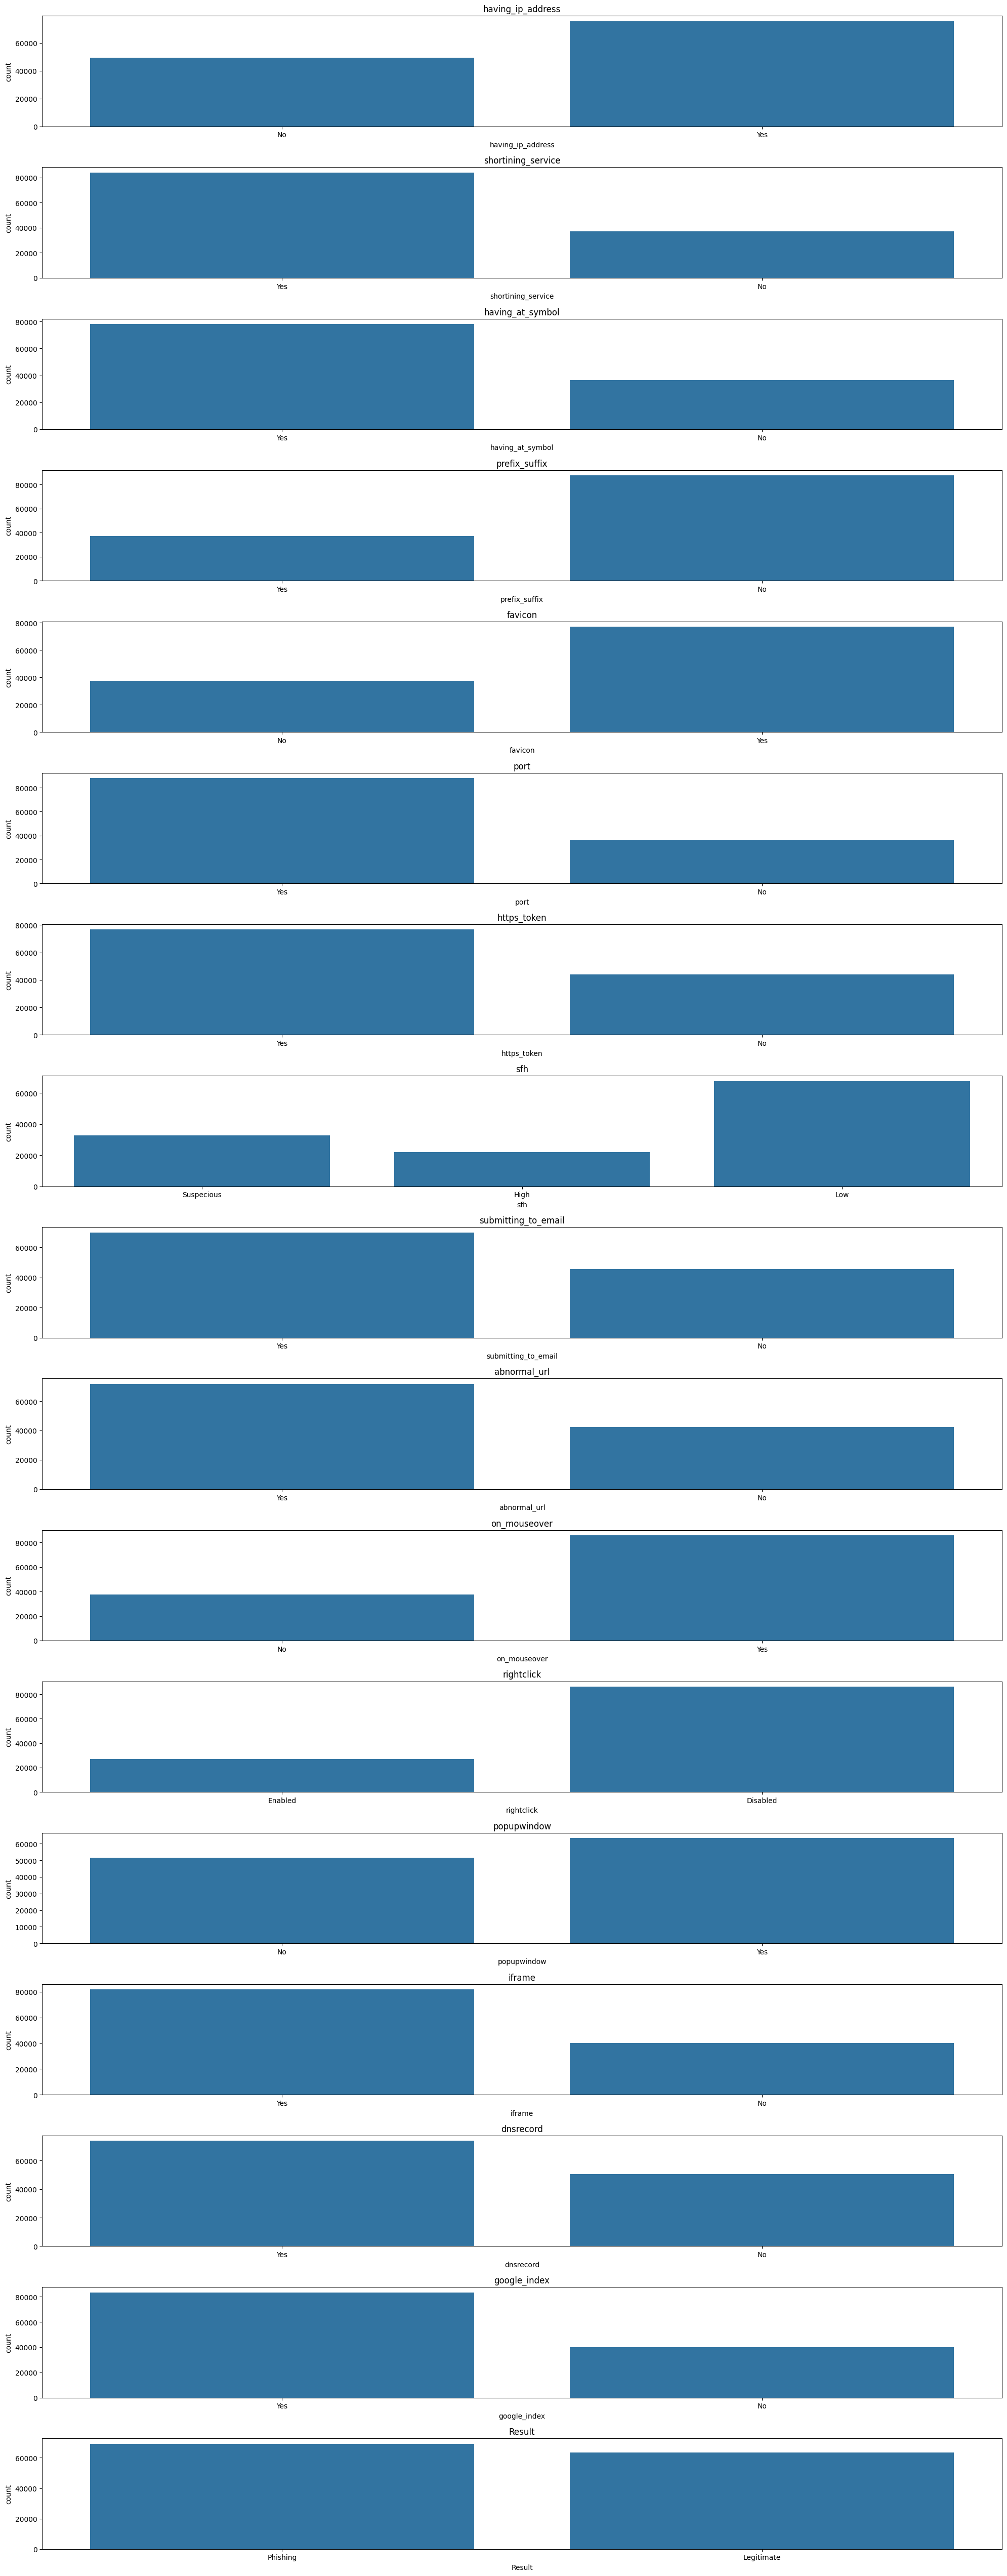

In [429]:
# Ambil hanya kolom non-numerik
categorical_columns_train = train.select_dtypes(include=['object']).columns

# Ukuran figure yang lebih besar
plt.figure(figsize=(20, len(categorical_columns_train) * 3))

# Membuat countplot untuk setiap variabel kategorik
for i, col in enumerate(categorical_columns_train, 1):
    plt.subplot(len(categorical_columns_train), 1, i)
    sns.countplot(data=train, x=col)
    plt.title(col)
    plt.xticks()

plt.tight_layout()
plt.show()

In [430]:
# Ambil hanya kolom numerik
num_cols_tr = train.columns.difference(categorical_columns_train)
num_cols_tr

Index(['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'id', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor'],
      dtype='object')

<Figure size 1500x2000 with 0 Axes>

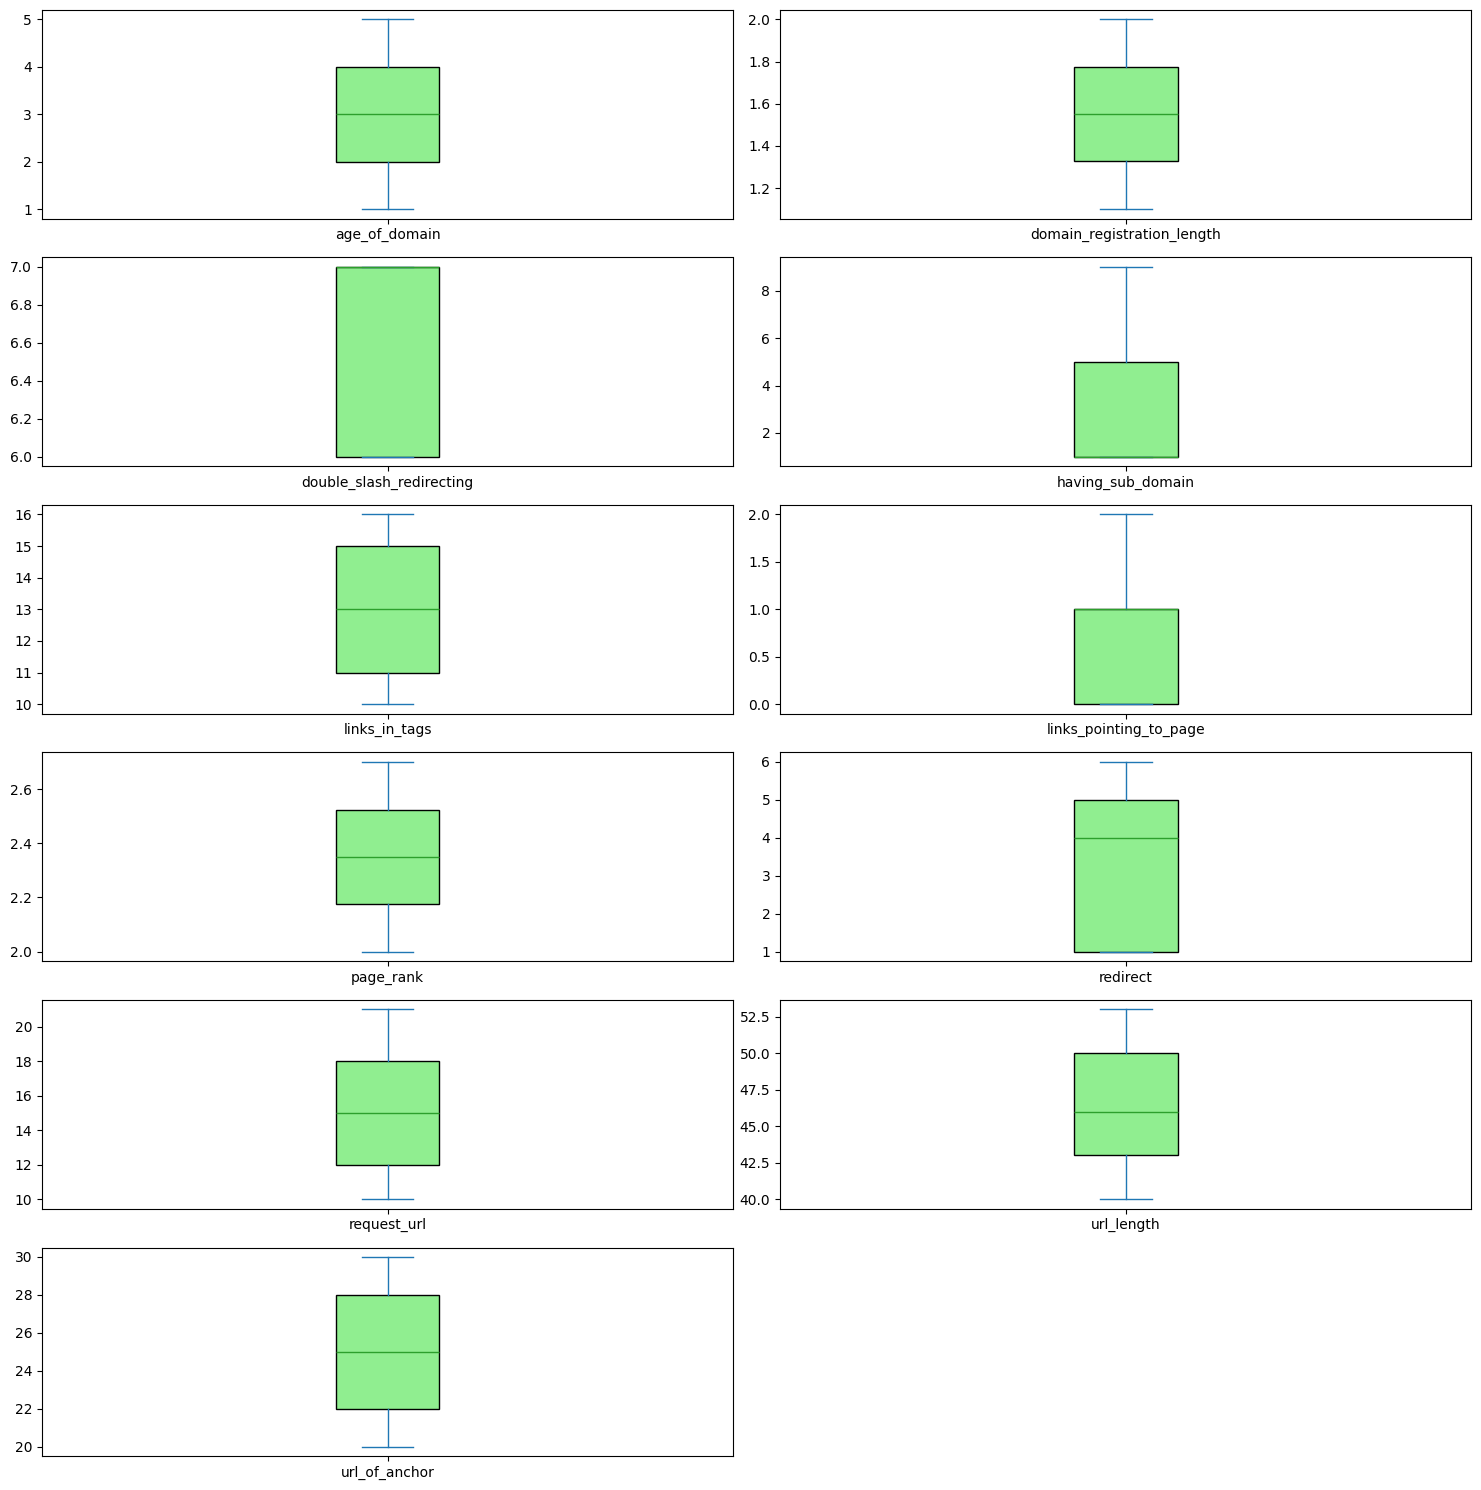

In [431]:
#  Membuat boxplot untuk setiap variabel
plt.figure(figsize=(15, 20))

# Daftar kolom yang akan dibuat boxplot
columns_num_tr = ['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor']

# Membuat boxplot
train[columns_num_tr].plot(kind='box', subplots=True, layout=(6, 2), figsize=(15, 15), grid=False,
                           patch_artist=True, boxprops=dict(facecolor="lightgreen"))

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-432-283ff4c41b50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['Result'], data=train, palette='pastel')


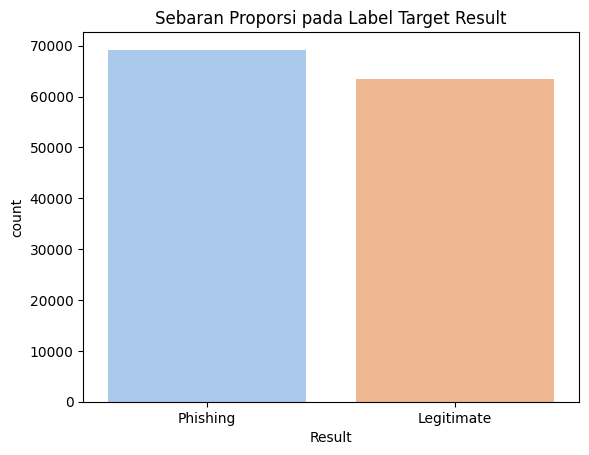

In [432]:
# Sebaran proporsi pada label target sebelum SMOTE
sns.countplot(x=train['Result'], data=train, palette='pastel')
plt.xlabel('Result')
plt.title('Sebaran Proporsi pada Label Target Result')
plt.show()

#**DATA PREPOSESSING (1)**

## Data Train

In [433]:
# Menampilkan baris yang duplikat
duplicates_train = train[train.duplicated()]
duplicates_train

,id,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,domain_registration_length,favicon,...,on_mouseover,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,page_rank,google_index,links_pointing_to_page,Result


### Missing Value

In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132660 entries, 0 to 132659
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          132660 non-null  int64  
 1   having_ip_address           124865 non-null  object 
 2   url_length                  132660 non-null  int64  
 3   shortining_service          121041 non-null  object 
 4   having_at_symbol            114554 non-null  object 
 5   double_slash_redirecting    132660 non-null  int64  
 6   prefix_suffix               124753 non-null  object 
 7   having_sub_domain           132660 non-null  int64  
 8   domain_registration_length  132660 non-null  float64
 9   favicon                     114643 non-null  object 
 10  port                        124446 non-null  object 
 11  https_token                 120692 non-null  object 
 12  request_url                 132660 non-null  int64  
 13  url_of_anchor 

In [435]:
# Menggabungkan hasil ke dalam satu DataFrame dengan 2 kolom
na_summary = pd.DataFrame({
    'Jumlah NaN': train.isna().sum(),
    'Persentase NaN (%)': (train.isna().sum() / len(train)) * 100
})
print(na_summary)

                            Jumlah NaN  Persentase NaN (%)
id                                   0            0.000000
having_ip_address                 7795            5.875923
url_length                           0            0.000000
shortining_service               11619            8.758480
having_at_symbol                 18106           13.648425
double_slash_redirecting             0            0.000000
prefix_suffix                     7907            5.960350
having_sub_domain                    0            0.000000
domain_registration_length           0            0.000000
favicon                          18017           13.581336
port                              8214            6.191768
https_token                      11968            9.021559
request_url                          0            0.000000
url_of_anchor                        0            0.000000
links_in_tags                        0            0.000000
sfh                              10324            7.7823

In [436]:
train_cols = train.columns[train.isnull().any()]
train_cols

Index(['having_ip_address', 'shortining_service', 'having_at_symbol',
       'prefix_suffix', 'favicon', 'port', 'https_token', 'sfh',
       'submitting_to_email', 'abnormal_url', 'on_mouseover', 'rightclick',
       'popupwindow', 'iframe', 'dnsrecord', 'google_index'],
      dtype='object')

In [437]:
# Ambil hanya kolom non-numerik
categorical_columns_train = train.select_dtypes(include=['object']).columns

# Filter hanya kolom yang memiliki missing value
categorical_train_with_nan = [col for col in categorical_columns_train if train[col].isnull().sum() > 0]
categorical_train_with_nan

['having_ip_address',
 'shortining_service',
 'having_at_symbol',
 'prefix_suffix',
 'favicon',
 'port',
 'https_token',
 'sfh',
 'submitting_to_email',
 'abnormal_url',
 'on_mouseover',
 'rightclick',
 'popupwindow',
 'iframe',
 'dnsrecord',
 'google_index']

In [438]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

for col in categorical_train_with_nan:
    #imputer = SimpleImputer(strategy='median')
    imputer = SimpleImputer(strategy='most_frequent')
    #imputer = KNNImputer()
    train[[col]] = imputer.fit_transform(train[[col]])
    #test[[col]] = imputer.fit_transform(test[[col]])

In [439]:
train_cols = train.columns[train.isnull().any()]
train_cols

Index([], dtype='object')

### Standarisasi variabel numerik

In [440]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [441]:
# Ambil hanya kolom numerik
num_cols_tr = train.columns.difference(categorical_columns_train)
num_cols_tr

Index(['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'id', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor'],
      dtype='object')

In [442]:
# Daftar kolom yang akan di-scale
num_cols_tr = ['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor'] # kecuali id

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Loop untuk melakukan Min-Max scaling
for col in num_cols_tr:
    # Reshape kolom menjadi 2D array
    reshaped_data = train[col].values.reshape(-1, 1)

    # Melakukan scaling
    scaled_data = scaler.fit_transform(reshaped_data)

    # Mengganti kolom asli dengan data yang telah di-scale
    train[col] = scaled_data

### Label Encoder

In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
# Cari kolom yang hanya berisi "Yes" dan "No" atau "Enabled" dan "Disabled"
yes_no_enabled_disabled_columns = [
    col for col in categorical_columns_train
    if train[col].dropna().isin(["Yes", "No", "Enabled", "Disabled"]).all()
]

yes_no_enabled_disabled_columns

['having_ip_address',
 'shortining_service',
 'having_at_symbol',
 'prefix_suffix',
 'favicon',
 'port',
 'https_token',
 'submitting_to_email',
 'abnormal_url',
 'on_mouseover',
 'rightclick',
 'popupwindow',
 'iframe',
 'dnsrecord',
 'google_index']

In [445]:
# Daftar kolom kategorikal yang akan di-label encode
cat_cols_tr = ['having_ip_address','shortining_service','having_at_symbol','prefix_suffix',
            'favicon','port','https_token','submitting_to_email','abnormal_url','on_mouseover',
            'rightclick','popupwindow','iframe','dnsrecord','google_index']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop untuk melakukan label encoding
for col in cat_cols_tr:
    train[col] = label_encoder.fit_transform(train[col])

In [446]:
# Melihat nilai unik dalam kolom 'sfh'
unique_values_sfh_tr = train['sfh'].unique()
unique_values_sfh_tr

array(['Suspecious', 'High', 'Low'], dtype=object)

In [447]:
# Tentukan urutan kategori yang diinginkan
category_order = ['Low', 'High', 'Suspecious']

# Ubah kolom 'sfh' menjadi kategori dengan urutan yang ditentukan
train['sfh'] = pd.Categorical(train['sfh'], categories=category_order, ordered=True)

# Ubah kategori menjadi angka sesuai urutan (0 untuk 'Low', 1 untuk 'High', 2 untuk 'Suspecious')
train['sfh'] = train['sfh'].cat.codes

# Cek hasil
print(train.head())

      id  having_ip_address  url_length  shortining_service  having_at_symbol  \
0  70005                  0    0.307692                   1                 1   
1  70006                  1    1.000000                   1                 1   
2  70007                  1    0.692308                   1                 0   
3  70008                  1    0.000000                   0                 1   
4  70009                  1    0.846154                   0                 1   

   double_slash_redirecting  prefix_suffix  having_sub_domain  \
0                       0.0              1               0.00   
1                       0.0              0               0.00   
2                       1.0              1               0.25   
3                       1.0              0               0.00   
4                       1.0              0               0.00   

   domain_registration_length  favicon  ...  on_mouseover  rightclick  \
0                    0.062661        0  ...      

In [448]:
# Mengubah 'Phishing' menjadi 1 dan 'Legitimate' menjadi 0
train['Result'] = train['Result'].map({'Phishing': 1, 'Legitimate': 0})

### SMOTE

In [449]:
from imblearn.over_sampling import SMOTE

In [450]:
# Menyiapkan fitur dan target
#X = train.drop(['id'], axis=1)
#y = train['Result']

# # Inisialisasi SMOTE
#sm = SMOTE(random_state=42)

# Menerapkan SMOTE untuk menangani ketidakseimbangan kelas
#X_res, y_res = sm.fit_resample(X, y)

# Menggabungkan kembali fitur dan target ke dalam DataFrame
#df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['damage_grade'])], axis=1)

## Data Test

In [451]:
# Menampilkan baris yang duplikat
duplicates_test = test[test.duplicated()]
duplicates_test

,id,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,domain_registration_length,favicon,...,redirect,on_mouseover,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,page_rank,google_index,links_pointing_to_page


### Missing Value

In [452]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   having_ip_address           59780 non-null  object 
 2   url_length                  70000 non-null  int64  
 3   shortining_service          64850 non-null  object 
 4   having_at_symbol            60021 non-null  object 
 5   double_slash_redirecting    70000 non-null  int64  
 6   prefix_suffix               64000 non-null  object 
 7   having_sub_domain           70000 non-null  int64  
 8   domain_registration_length  70000 non-null  float64
 9   favicon                     62312 non-null  object 
 10  port                        65216 non-null  object 
 11  https_token                 60889 non-null  object 
 12  request_url                 70000 non-null  int64  
 13  url_of_anchor               700

In [453]:
# Menggabungkan hasil ke dalam satu DataFrame dengan 2 kolom
na_summary_test = pd.DataFrame({
    'Jumlah NaN': test.isna().sum(),
    'Persentase NaN (%)': (test.isna().sum() / len(test)) * 100
})
print(na_summary_test)

                            Jumlah NaN  Persentase NaN (%)
id                                   0            0.000000
having_ip_address                10220           14.600000
url_length                           0            0.000000
shortining_service                5150            7.357143
having_at_symbol                  9979           14.255714
double_slash_redirecting             0            0.000000
prefix_suffix                     6000            8.571429
having_sub_domain                    0            0.000000
domain_registration_length           0            0.000000
favicon                           7688           10.982857
port                              4784            6.834286
https_token                       9111           13.015714
request_url                          0            0.000000
url_of_anchor                        0            0.000000
links_in_tags                        0            0.000000
sfh                               6020            8.6000

In [454]:
test_cols = test.columns[test.isnull().any()]
test_cols

Index(['having_ip_address', 'shortining_service', 'having_at_symbol',
       'prefix_suffix', 'favicon', 'port', 'https_token', 'sfh',
       'submitting_to_email', 'abnormal_url', 'on_mouseover', 'rightclick',
       'popupwindow', 'iframe', 'dnsrecord', 'google_index'],
      dtype='object')

In [455]:
# Ambil hanya kolom non-numerik
categorical_columns_test = test.select_dtypes(include=['object']).columns

# Filter hanya kolom yang memiliki missing value
categorical_test_with_nan = [col for col in categorical_columns_test if test[col].isnull().sum() > 0]
categorical_test_with_nan

['having_ip_address',
 'shortining_service',
 'having_at_symbol',
 'prefix_suffix',
 'favicon',
 'port',
 'https_token',
 'sfh',
 'submitting_to_email',
 'abnormal_url',
 'on_mouseover',
 'rightclick',
 'popupwindow',
 'iframe',
 'dnsrecord',
 'google_index']

In [456]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

for col in categorical_test_with_nan:
    #imputer = SimpleImputer(strategy='median')
    imputer = SimpleImputer(strategy='most_frequent')
    #imputer = KNNImputer()
    #train[[col]] = imputer.fit_transform(train[[col]])
    test[[col]] = imputer.fit_transform(test[[col]])

In [457]:
test_cols = test.columns[test.isnull().any()]
test_cols

Index([], dtype='object')

### Standarisasi variabel numerik

In [458]:
# Ambil hanya kolom numerik
num_cols_te = train.columns.difference(categorical_columns_train)
num_cols_te

Index(['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'id', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor'],
      dtype='object')

In [459]:
# Daftar kolom yang akan di-scale
num_cols_te = ['age_of_domain', 'domain_registration_length',
       'double_slash_redirecting', 'having_sub_domain', 'links_in_tags',
       'links_pointing_to_page', 'page_rank', 'redirect', 'request_url',
       'url_length', 'url_of_anchor']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Loop untuk melakukan Min-Max scaling
for col in num_cols_te:
    # Reshape kolom menjadi 2D array
    reshaped_data = test[col].values.reshape(-1, 1)

    # Melakukan scaling
    scaled_data = scaler.fit_transform(reshaped_data)

    # Mengganti kolom asli dengan data yang telah di-scale
    test[col] = scaled_data

### Label *Encoder*

In [460]:
# Daftar kolom kategorikal yang akan di-label encode
cat_cols_te = ['having_ip_address','shortining_service','having_at_symbol','prefix_suffix',
            'favicon','port','https_token','submitting_to_email','abnormal_url','on_mouseover',
            'rightclick','popupwindow','iframe','dnsrecord','google_index']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop untuk melakukan label encoding
for col in cat_cols_tr:
    test[col] = label_encoder.fit_transform(test[col])

In [461]:
# Melihat nilai unik dalam kolom 'sfh'
unique_values_sfh_te = test['sfh'].unique()
unique_values_sfh_te

array(['Low', 'High', 'Suspecious'], dtype=object)

In [462]:
# Tentukan urutan kategori yang diinginkan
category_order = ['Low', 'High', 'Suspecious']

# Ubah kolom 'sfh' menjadi kategori dengan urutan yang ditentukan
test['sfh'] = pd.Categorical(test['sfh'], categories=category_order, ordered=True)

# Ubah kategori menjadi angka sesuai urutan (0 untuk 'Low', 1 untuk 'High', 2 untuk 'Suspecious')
test['sfh'] = test['sfh'].cat.codes

# Cek hasil
print(test.head())

   id  having_ip_address  url_length  shortining_service  having_at_symbol  \
0   1                  1    0.769231                   1                 1   
1   2                  1    0.076923                   1                 1   
2   3                  0    0.538462                   1                 0   
3   4                  1    0.769231                   1                 1   
4   5                  0    0.692308                   0                 1   

   double_slash_redirecting  prefix_suffix  having_sub_domain  \
0                       1.0              0              0.000   
1                       1.0              0              0.625   
2                       0.0              0              0.000   
3                       0.0              0              0.000   
4                       0.0              0              0.875   

   domain_registration_length  favicon  ...  redirect  on_mouseover  \
0                    0.820799        1  ...       0.8             0  

# EDA (2)

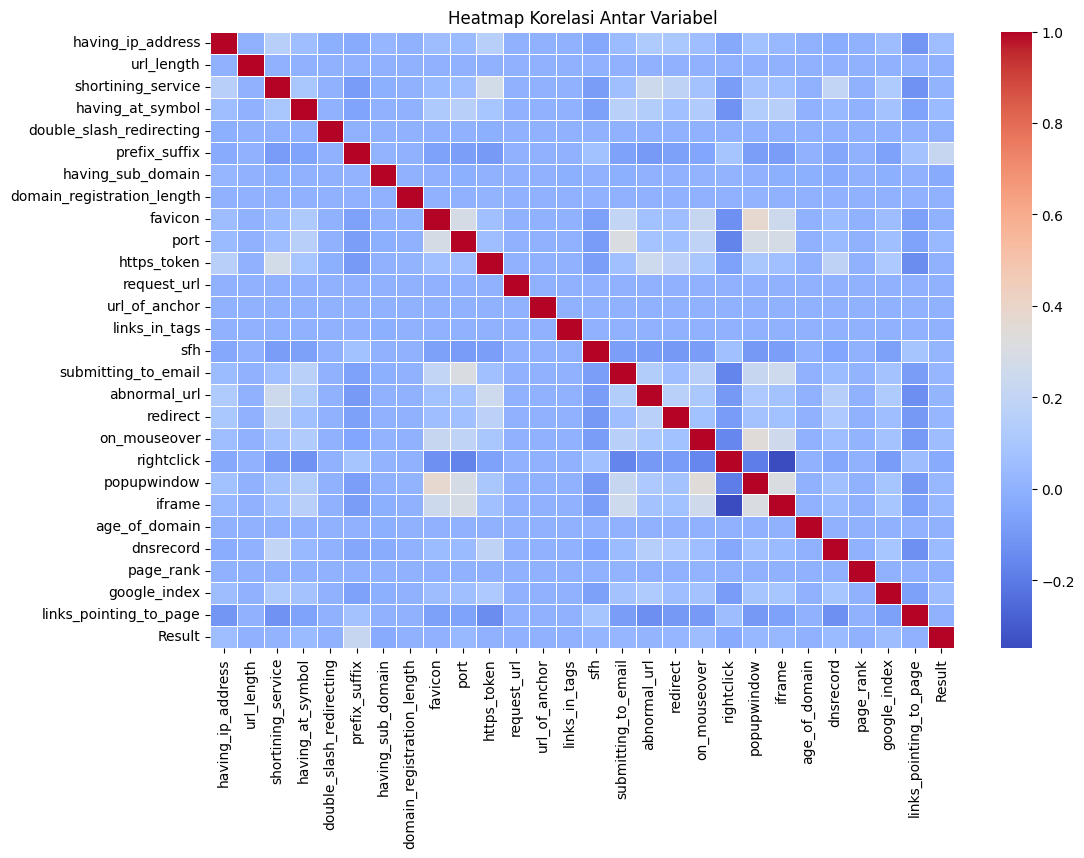

Result                        1.000000
prefix_suffix                 0.217339
having_ip_address             0.054626
on_mouseover                  0.051319
google_index                  0.050017
having_at_symbol              0.041843
dnsrecord                     0.038017
port                          0.032923
iframe                        0.030092
popupwindow                   0.027254
submitting_to_email           0.024994
redirect                      0.024823
sfh                           0.019822
abnormal_url                  0.011268
shortining_service            0.007543
favicon                       0.005185
https_token                   0.005127
domain_registration_length    0.001818
url_of_anchor                 0.001101
double_slash_redirecting      0.001016
age_of_domain                 0.000560
links_pointing_to_page       -0.000373
page_rank                    -0.002269
url_length                   -0.003490
links_in_tags                -0.003500
request_url              

In [463]:
# Menghitung korelasi
corr_matrix_train = train.drop('id', axis=1).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_train, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Menampilkan korelasi dengan target variabel
target_corr_train = corr_matrix_train["Result"].sort_values(ascending=False)
print(target_corr_train)

In [464]:
#  Membuat boxplot untuk setiap variabel
#plt.figure(figsize=(15, 10))

# Daftar kolom yang akan dibuat boxplot
#columns = ['floors_before_eq (total)','old_building', 'plinth_area (ft^2)', 'height_before_eq (ft)', 'no_family_residing']

# Membuat boxplot
#df_train[columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), grid=True)

# Menampilkan plot
#plt.tight_layout()
#plt.show()

# Feature Selection

In [465]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, RFE
import shap

In [466]:
# Pisahkan variabel independen (X) dan dependen (y)
X = train.drop(columns=['id', 'Result'])
y = train['Result']

# Buat model Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tampilkan fitur berdasarkan kepentingannya
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
7,domain_registration_length,0.162367
24,page_rank,0.162085
1,url_length,0.081947
11,request_url,0.076553
12,url_of_anchor,0.073420
13,links_in_tags,0.058207
5,prefix_suffix,0.047405
22,age_of_domain,0.046454
6,having_sub_domain,0.041489
17,redirect,0.035130


In [467]:
#train = train.drop(columns=['on_mouseover','having_ip_address','google_index'])
#test = test.drop(columns=['on_mouseover','having_ip_address','google_index'])

In [468]:
train.shape, test.shape

((132660, 29), (70000, 28))

# Pembentukan Model

## Splitting Data

In [469]:
# Pisahkan variabel independen (X) dan dependen (y)
X = train.drop(columns=['id', 'Result'])
y = train['Result']

In [470]:
# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [471]:
X_test2 = test.drop(['id'], axis=1)

In [472]:
X_test2

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,domain_registration_length,favicon,port,...,redirect,on_mouseover,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,page_rank,google_index,links_pointing_to_page
0,1,0.769231,1,1,1.0,0,0.000,0.820799,1,1,...,0.8,0,0,1,1,1.00,0,0.685317,1,0.0
1,1,0.076923,1,1,1.0,0,0.625,0.597023,0,1,...,0.0,1,1,0,0,0.50,0,0.908271,1,0.0
2,0,0.538462,1,0,0.0,0,0.000,0.260837,1,1,...,0.8,1,0,0,0,1.00,1,0.149017,0,0.0
3,1,0.769231,1,1,0.0,0,0.000,0.737744,1,1,...,0.0,1,1,0,0,0.25,0,0.893152,1,1.0
4,0,0.692308,0,1,0.0,0,0.875,0.776872,1,1,...,0.0,1,0,1,1,1.00,0,0.187416,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0.923077,1,1,0.0,0,0.000,0.627474,1,1,...,1.0,1,0,0,1,0.00,1,0.087834,1,0.0
69996,1,0.000000,1,1,1.0,1,0.375,0.534713,1,1,...,1.0,1,1,1,1,0.75,0,0.324724,1,1.0
69997,1,0.615385,1,1,1.0,1,0.625,0.223382,0,0,...,1.0,0,0,0,0,1.00,0,0.616504,1,1.0
69998,0,0.153846,1,1,1.0,0,1.000,0.993183,0,1,...,0.0,1,0,1,0,0.25,0,0.276336,0,0.5


## Modelling

### Random Forest

In [473]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [474]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, predictions_rf, digits=4))

Random Forest Classifier
              precision    recall  f1-score   support

           0     0.5860    0.6434    0.6134     19022
           1     0.6414    0.5839    0.6113     20776

    accuracy                         0.6123     39798
   macro avg     0.6137    0.6137    0.6123     39798
weighted avg     0.6149    0.6123    0.6123     39798



### HistGradientBoostingClassifier

In [475]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_sm_clf = HistGradientBoostingClassifier(random_state=42)
hgbc_sm_clf.fit(X_train, y_train)
hgbc_sm_pred = hgbc_sm_clf.predict(X_test)
metrics = classification_report(y_test, hgbc_sm_pred, digits=4)
print("\n",metrics)


               precision    recall  f1-score   support

           0     0.5918    0.6751    0.6307     19022
           1     0.6585    0.5736    0.6131     20776

    accuracy                         0.6221     39798
   macro avg     0.6251    0.6244    0.6219     39798
weighted avg     0.6266    0.6221    0.6215     39798



### XGBoost

In [476]:
# Membuat model XGBoost
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=100,  # Jumlah pohon (trees)
    learning_rate=0.1,  # Tingkat pembelajaran
    max_depth=5,       # Kedalaman maksimum pohon
    random_state=42,    # Seed untuk reproducibility
    objective='binary:logistic'  # Untuk klasifikasi biner
)

# Melatih model
model.fit(X_train,y_train)
xgb_pred = model.predict(X_test)
metrics2 = classification_report(y_test, xgb_pred, digits=4)
print("\n",metrics2)


               precision    recall  f1-score   support

           0     0.5909    0.6534    0.6206     19022
           1     0.6486    0.5858    0.6156     20776

    accuracy                         0.6181     39798
   macro avg     0.6198    0.6196    0.6181     39798
weighted avg     0.6210    0.6181    0.6180     39798



### LightGBM

In [477]:
# Membangun dan Melatih Model LightGBM
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgb.fit(X_train,y_train)
lgb_pred = model_lgb.predict(X_test)
metrics3 = classification_report(y_test, lgb_pred, digits=4)
print("\n",metrics3)

[LightGBM] [Info] Number of positive: 48427, number of negative: 44435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 92862, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521494 -> initscore=0.086030
[LightGBM] [Info] Start training from score 0.086030

               precision    recall  f1-score   support

           0     0.5922    0.6727    0.6299     19022
           1     0.6578    0.5760    0.6141     20776

    accuracy                         0.6222     39798
   macro avg     0.6250    0.6243    0.6220     39798
weighted avg     0.6264    0.6222    0.6217     39798



In [478]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur numerik
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Bangun model Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output 1 neuron dengan aktivasi sigmoid
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2902/2902 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5675 - loss: 0.6783 - val_accuracy: 0.6135 - val_loss: 0.6574
Epoch 2/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6069 - loss: 0.6598 - val_accuracy: 0.6103 - val_loss: 0.6577
Epoch 3/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6124 - loss: 0.6574 - val_accuracy: 0.6161 - val_loss: 0.6539
Epoch 4/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6183 - loss: 0.6542 - val_accuracy: 0.6195 - val_loss: 0.6538
Epoch 5/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6166 - loss: 0.6544 - val_accuracy: 0.6191 - val_loss: 0.6526
Epoch 6/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6171 - loss: 0.6543 - val_accuracy: 0.6145 - val_loss: 0.6536
Epoch 7/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6196 - loss: 0.6530 - val_accuracy: 0.6185 - val_loss: 0.6524
Epoch 8/20
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6196 - loss: 0.6520 - val_ac

In [479]:
accuracy

0.6192019581794739

## Memprediksi Label pada Data Test

### HistGradientBoostingClassifier

In [480]:
predict2 = model_lgb.predict(X_test2)

In [481]:
# Mengubah tipe data menjadi series dan data frame
y_pred_rf = pd.Series(predict2)
y_pred = pd.DataFrame({'Result': y_pred_rf})
y_pred

,Result
0,0
1,0
2,0
3,0
4,1
...,...
69995,0
69996,1
69997,1
69998,0


In [482]:
# Menggabungkan kolo ID dan hasil prediksi damage_grade
id = test['id']

results = pd.concat([id, y_pred], axis=1)
results

,id,Result
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
69995,69996,0
69996,69997,1
69997,69998,1
69998,69999,0


In [483]:
# Mengubah 1 menjadi 'Phishing' dan 0 menjadi 'Legitimate'
results['Result'] = results['Result'].map({1: 'Phishing', 0: 'Legitimate'})
results

,id,Result
0,1,Legitimate
1,2,Legitimate
2,3,Legitimate
3,4,Legitimate
4,5,Phishing
...,...,...
69995,69996,Legitimate
69996,69997,Phishing
69997,69998,Phishing
69998,69999,Legitimate


In [484]:
# Mengubah format file menjadi .csv
results.to_csv('bismillah5.csv', index=False)